**Data Description**
You are given state-specific data on the relative frequency of given names in the population of U.S. births where the individual has a Social Security Number (Tabulated based on Social Security records as of March 6, 2022)

For each of the 50 states and the District of Columbia we created a file called SC.txt, where SC is the state's postal abbreviation.

*Each record in a file has the format: 2-digit state code, sex (M = male or F = female), 4-digit year of birth (starting with 1910), the 2-15 character name, and the number of occurrences of the name.* Fields are delimited with a comma. Each file is sorted first on sex, then year of birth, and then on number of occurrences in descending order. When there is a tie on the number of occurrences names are listed in alphabetical order. This sorting makes it easy to determine a name's rank. The first record for each sex & year of birth has rank 1, the second record has rank 2, and so forth.

To safeguard privacy, we restrict our list of names to those with at least 5 occurrences. If a name has less than 5 occurrences for a year of birth in any state, the sum of the state counts for that year will be less than the national count.

In [69]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


In [70]:
# Get a list of all the .txt files in the directory
txt_files = glob.glob("datasets/*.TXT")


In [71]:
#2-digit state code, 
#sex (M = male or F = female), 
#4-digit year of birth (starting with 1910), 
#the 2-15 character name, 
#and the number of occurrences of the name.

In [72]:
# Read each .txt file into a Pandas DataFrame
dfs = []
for file in txt_files:
    df = pd.read_csv(file, names = ["State", "Gender", "YOB", "Name", "Occurances"] )
    dfs.append(df)

In [73]:
# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs)

In [74]:
df.head()

,State,Gender,YOB,Name,Occurances
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [75]:
df.shape

(6311504, 5)

In [76]:
#unique states
states = df["State"].unique()
states

array(['IN', 'IL', 'KS', 'SC', 'HI', 'GA', 'SD', 'CO', 'NH', 'MS', 'MD',
       'UT', 'LA', 'ME', 'WI', 'NJ', 'AR', 'NY', 'MT', 'OK', 'MA', 'NM',
       'WY', 'OH', 'OR', 'NV', 'TX', 'TN', 'AZ', 'MN', 'WA', 'WV', 'NC',
       'MO', 'AL', 'VA', 'CA', 'CT', 'AK', 'ND', 'VT', 'MI', 'NE', 'KY',
       'ID', 'DC', 'IA', 'FL', 'PA', 'RI', 'DE'], dtype=object)

In [77]:
total = sum(1 for i in states if i)
print(total)

51


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311504 entries, 0 to 33705
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   State       object
 1   Gender      object
 2   YOB         int64 
 3   Name        object
 4   Occurances  int64 
dtypes: int64(2), object(3)
memory usage: 288.9+ MB


In [79]:
#identify incomplet rows
df.count()

State         6311504
Gender        6311504
YOB           6311504
Name          6311504
Occurances    6311504
dtype: int64

In [80]:
# Check for missing values
missing_values = df.isna().sum()
missing_values

State         0
Gender        0
YOB           0
Name          0
Occurances    0
dtype: int64

**Descriptive analysis**

Please describe the format of the data files. Can you identify any limitations or distortions of the data?
What is the most popular name of all time? (Of either gender.)
What is the most gender ambiguous name in 2013? 1945?
Of the names represented in the data, find the name that has had the largest percentage increase in popularity since 1980. Largest decrease?
Can you identify names that may have had an even larger increase or decrease in popularity?

**Onward to Insight**

What insight can you extract from this dataset? Feel free to combine the baby names data with other publicly available datasets or APIs, but be sure to include code for accessing any alternative data that you use.

This is an open­ended question and you are free to answer as you see fit. In fact, we would love it if you find an interesting way to look at the data that we haven't thought of!

Please provide us with both your code and an informative write­up of your results. The code should be in a runnable form. Do not assume that we have a copy of the data set or that we are familiar with the build procedures for your chosen language.

In [81]:
#the most popular name of all time? 
df["Name"].value_counts()

James        7409
Leslie       7407
Lee          7313
John         7221
Robert       7174
             ... 
Charizma        1
Maclean         1
Haelee          1
Isaid           1
Ugochukwu       1
Name: Name, Length: 32403, dtype: int64

In [82]:
df["YOB"].max()

2021

In [83]:
df["YOB"].min()

1910

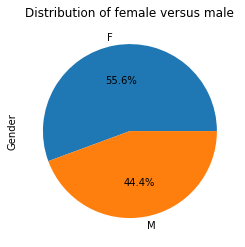

In [87]:
gender= df["Gender"].value_counts()
plt.title("Distribution of female versus male")
gender.plot(kind = "pie", autopct= "%1.1f%%")
plt.show()

In [89]:
names_total = df["Name"].value_counts()

In [92]:
names_total

James        7409
Leslie       7407
Lee          7313
John         7221
Robert       7174
             ... 
Charizma        1
Maclean         1
Haelee          1
Isaid           1
Ugochukwu       1
Name: Name, Length: 32403, dtype: int64

In [109]:
# Create a DataFrame from the value_counts() Series
df_names = pd.DataFrame(names_total).reset_index()
df_names.columns = ["Name", "Count"]
df_names


,Name,Count
0,James,7409
1,Leslie,7407
2,Lee,7313
3,John,7221
4,Robert,7174
...,...,...
32398,Charizma,1
32399,Maclean,1
32400,Haelee,1
32401,Isaid,1


In [113]:
#not popular names
names_1 = df_names.loc[(df_names["Count"] == 1),:].count()
names_1

Name     6835
Count    6835
dtype: int64

In [ ]:
#Out of a total of 32,403 unique names, there are 6,835 names that occur only once.